In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster',rc={"lines.linewidth":1})


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import kid_readout.analysis.process_mmw_response

no data directory set up for clouds defaulting to /data


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-02-24_114043_mmw_frequency_sweep.nc',k) for k in range(16)]

In [6]:
mmws.extend([kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-02-24_122244_mmw_frequency_sweep.nc',k) for k in range(16)])

In [15]:
!mkdir /artemis/readout/plots/2016-02-23-jpl-2015-10-park-40nm-al-nb-gp

In [16]:
plot_dir = '/artemis/readout/plots/2016-02-23-jpl-2015-10-park-40nm-al-nb-gp/'

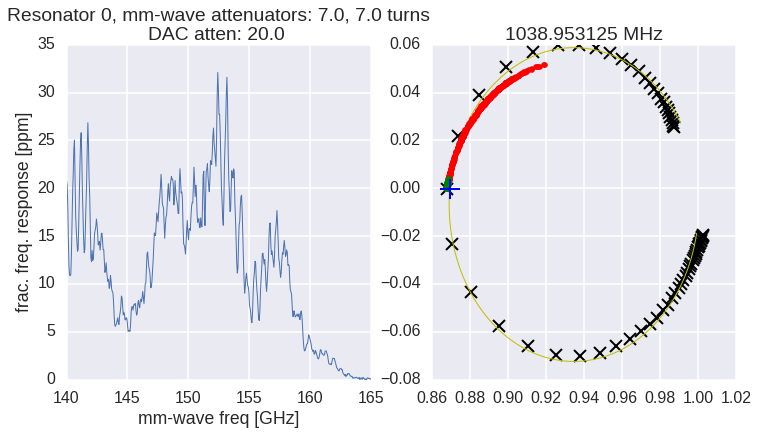

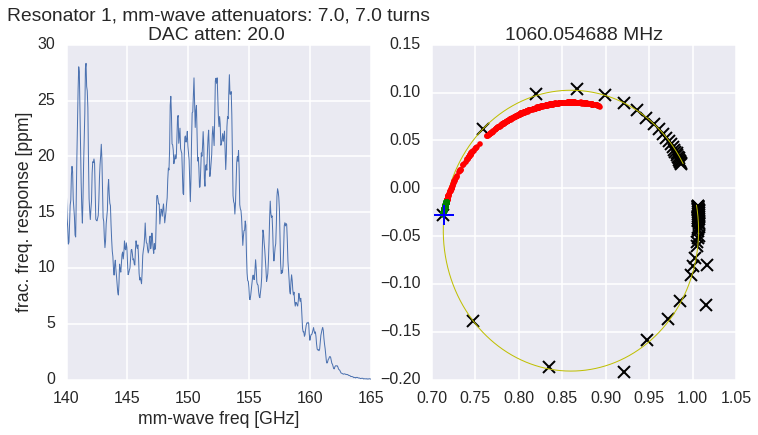

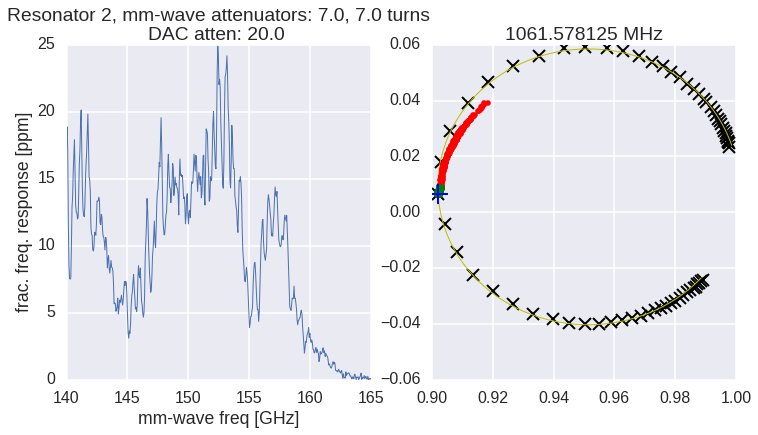

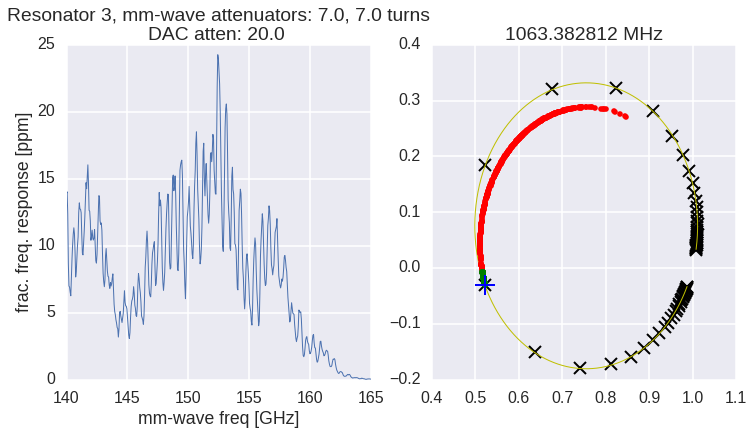

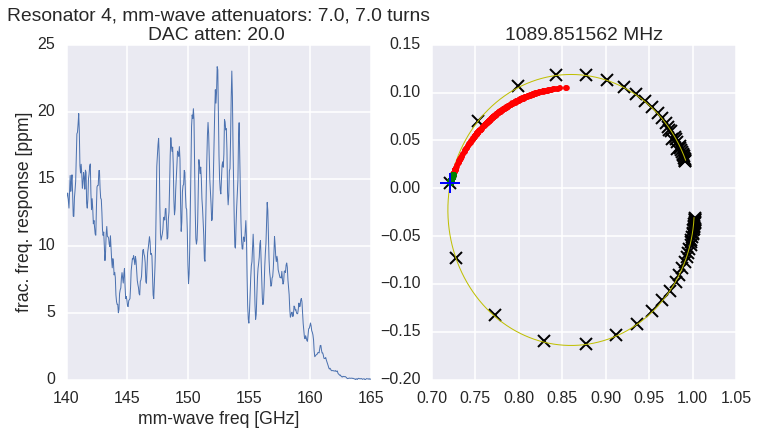

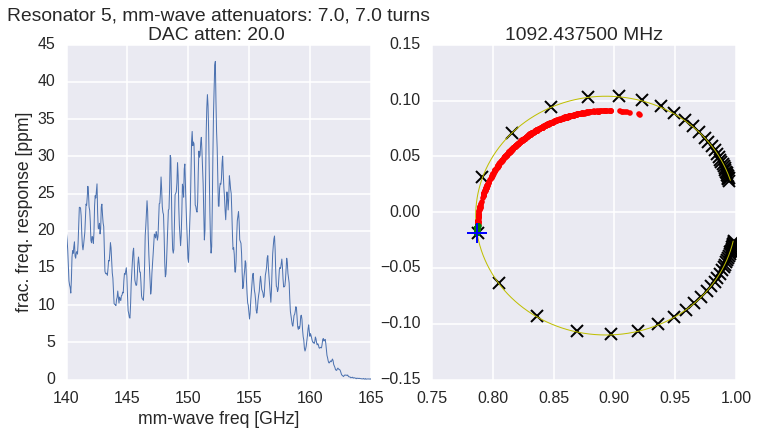

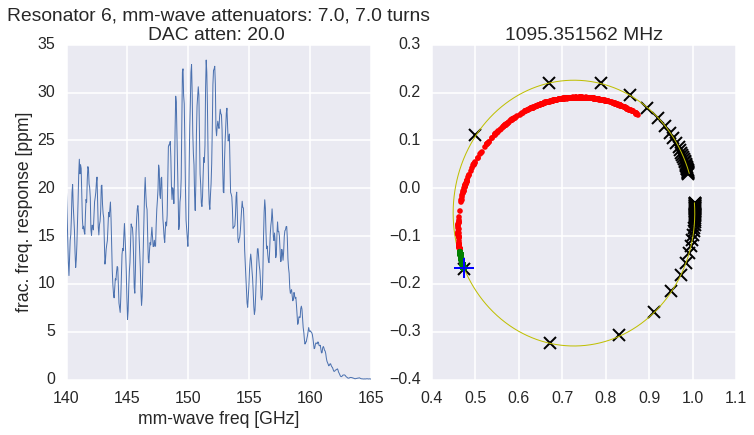

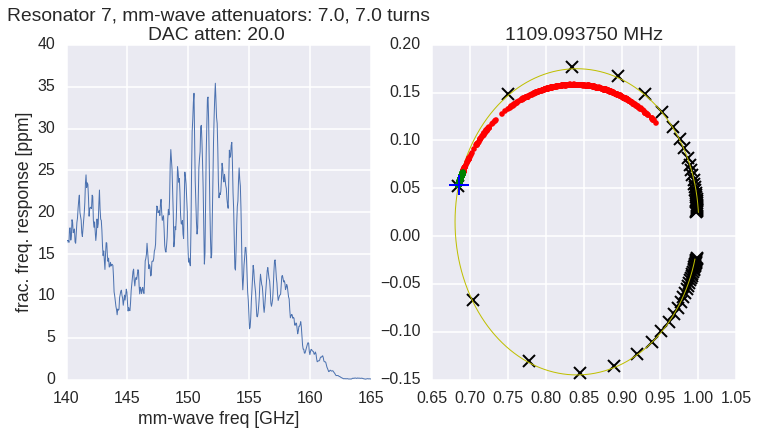

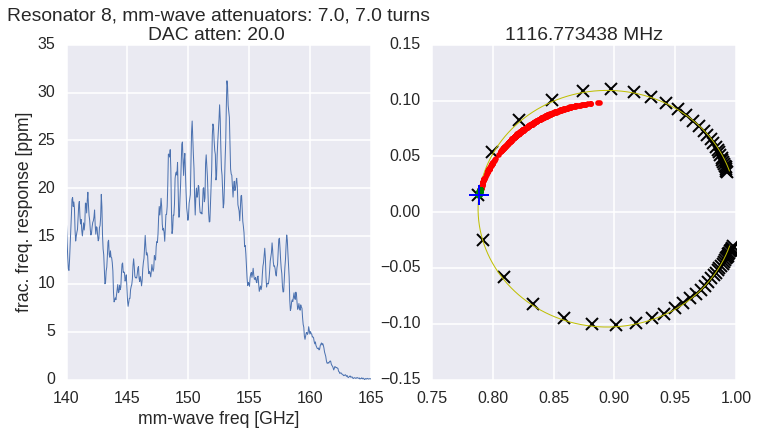

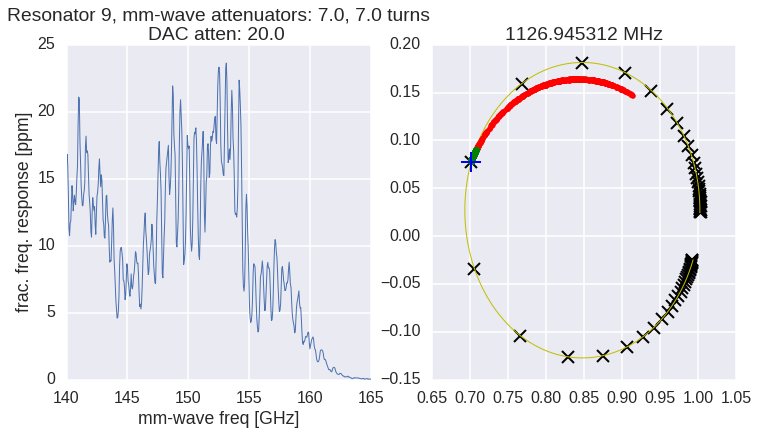

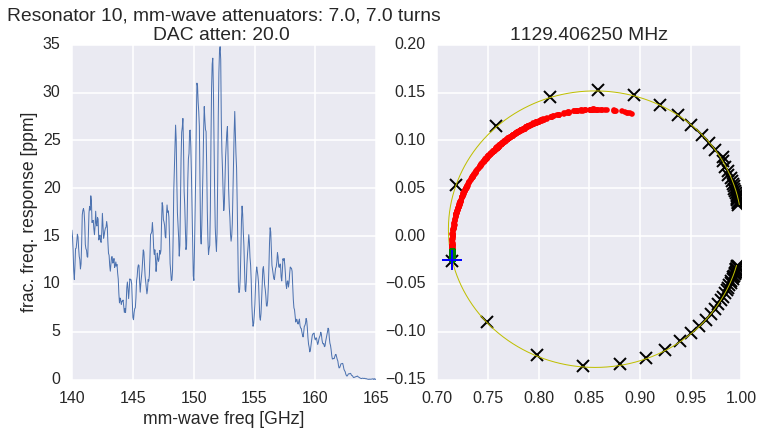

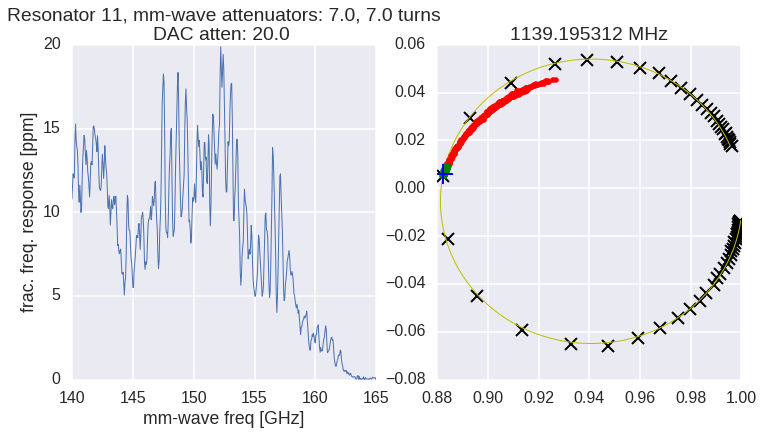

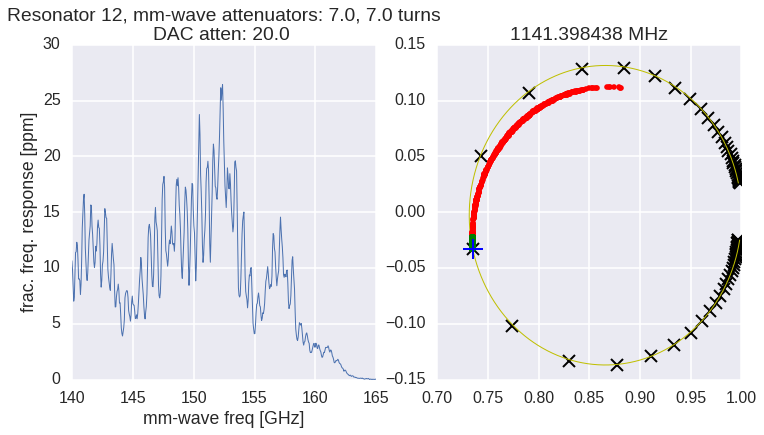

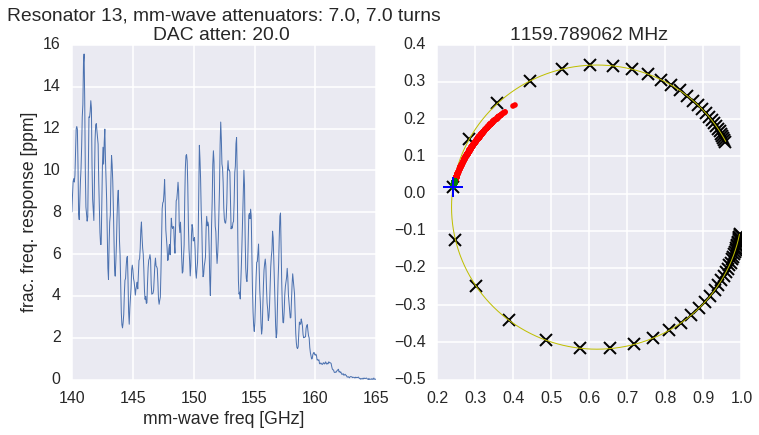

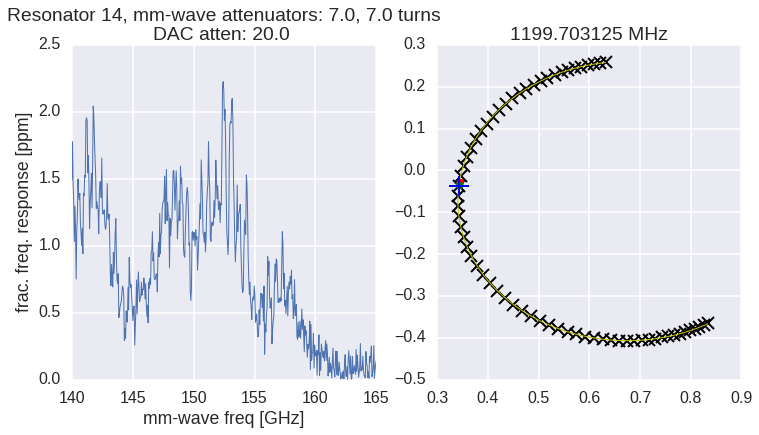

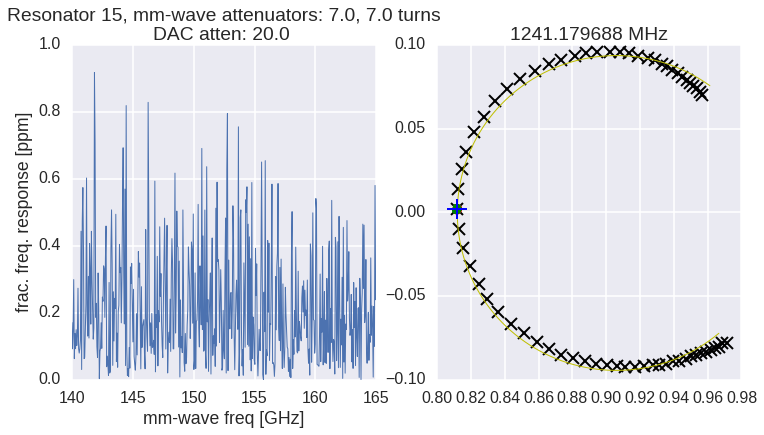

In [5]:
for mmw in mmws:
    blah= mmw.plot()
    #plt.savefig(plot_dir + ('mmw-detail-%.1f_MHz.png' % mmw.resonator.f_0),bbox_inches='tight')

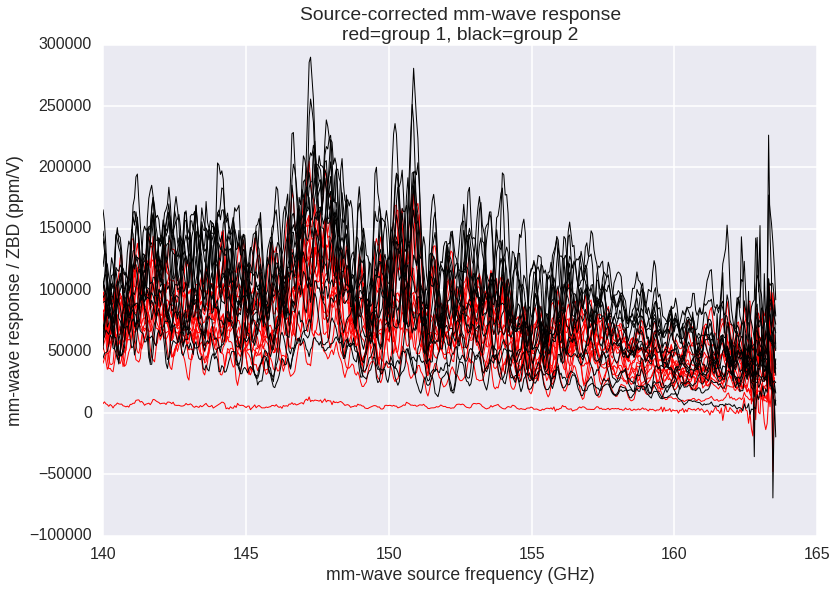

In [7]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response/mmw.zbd_voltage,color=color)#/ mmw.zbd_voltage)
#ylim(.1,20)
ylabel('mm-wave response / ZBD (ppm/V)')
xlabel('mm-wave source frequency (GHz)')
title('Source-corrected mm-wave response\nred=group 1, black=group 2')
#plt.savefig(plot_dir + ('mmw-normalized-sweeps.png'),bbox_inches='tight')

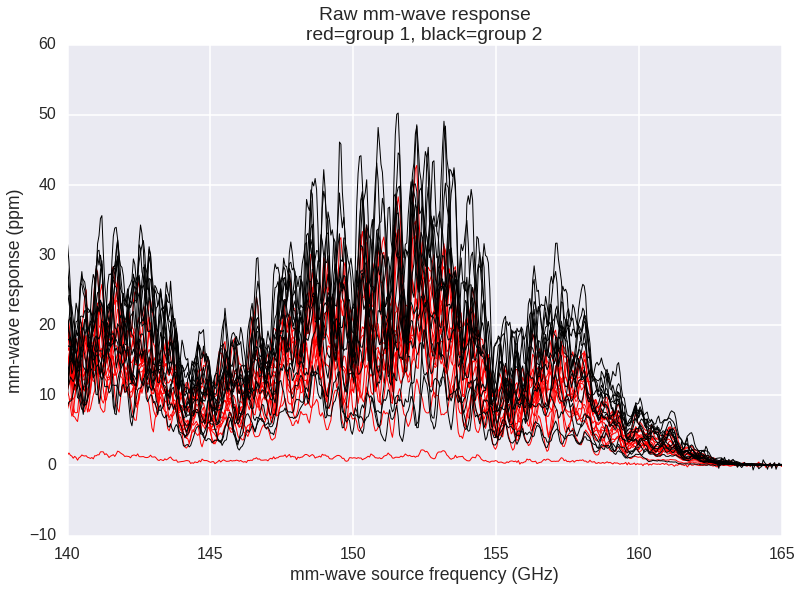

In [8]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,color=color)#/ mmw.zbd_voltage)
#ylim(.1,20)
ylabel('mm-wave response (ppm)')
xlabel('mm-wave source frequency (GHz)')
title('Raw mm-wave response\nred=group 1, black=group 2')
#plt.savefig(plot_dir + ('mmw-raw-sweeps.png'),bbox_inches='tight')

(0.1, 5)

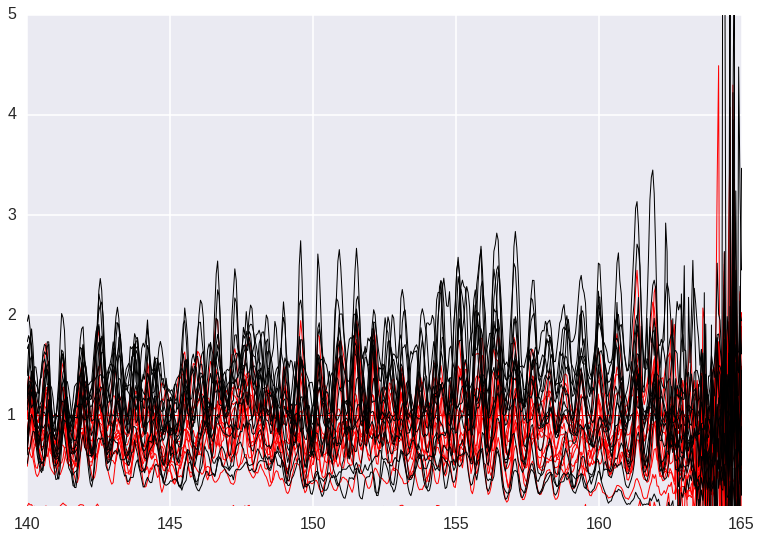

In [9]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmws[1].mmw_frac_response,color=color)#/ mmw.zbd_voltage)
ylim(.1,5)

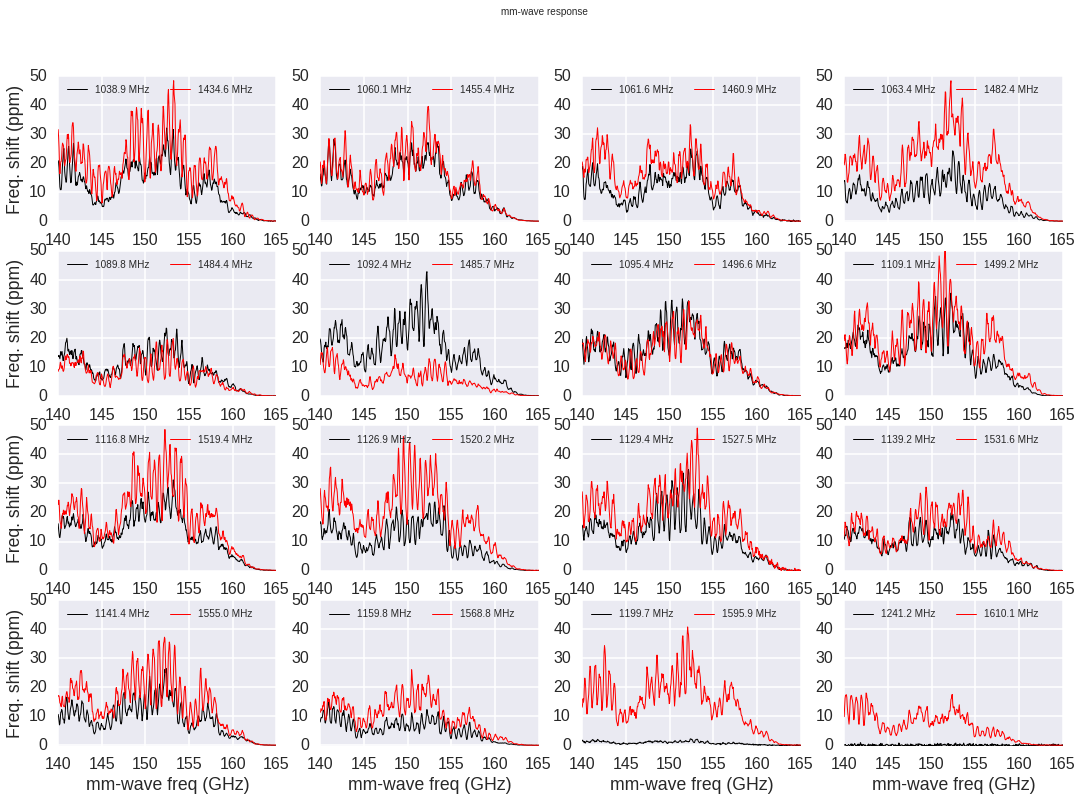

In [10]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(-.1,50)
    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
for k in range(4):
    axs[-1,k].set_xlabel('mm-wave freq (GHz)')
    axs[k,0].set_ylabel('Freq. shift (ppm)')
fig.suptitle('mm-wave response')
#plt.savefig(plot_dir + ('mmw-response-panels.png'),bbox_inches='tight')

In [11]:
f0s = np.array([mmw.resonator.f_0 for mmw in mmws])
Qs = np.array([mmw.resonator.Q for mmw in mmws])
Qis = np.array([mmw.resonator.Q_i for mmw in mmws])
Qers = np.array([mmw.resonator.Q_e_real for mmw in mmws])

In [46]:
f0s[16:]

array([ 1434.55429732,  1455.36763097,  1460.88434885,  1482.4054753 ,
        1484.39670651,  1485.74461295,  1496.60311   ,  1499.18770029,
        1519.40161264,  1520.23687455,  1527.5499642 ,  1531.62123914,
        1554.9699099 ,  1568.78575539,  1595.90036304,  1610.0668665 ])

In [47]:
import pandas as pd

1038.94859346 1531.62123914 0.00120054517492
1060.05063865 1455.36763097 0.00119695205191
1061.58609171 1568.78575539 0.0012061198976
1063.38943285 1484.39670651 0.000913941145892
1089.84651286 1568.78575539 0.000931330167112
1092.43940954 1554.9699099 0.00137664474283
1095.3532888 1554.9699099 0.00133518556522
1109.09230773 1496.60311 0.00104907335683
1116.77167564 1496.60311 0.0011207251495
1126.94369976 1568.78575539 0.000941586869946
1129.41019944 1554.9699099 0.00129819656073
1139.1905325 1568.78575539 0.000939241253459
1141.40097232 1568.78575539 0.00075780866802
1159.78405395 1485.74461295 0.000768997886297
1199.66785648 1485.74461295 0.00236702715174
1241.17789598 1485.74461295 0.0027432885737


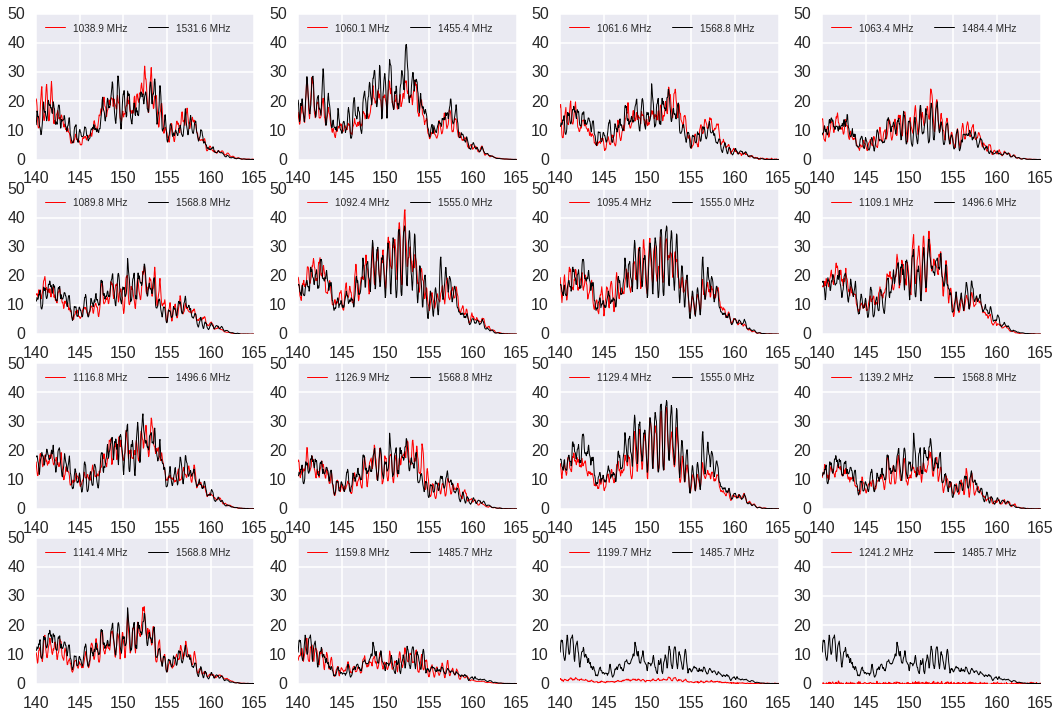

In [51]:
fig,axs = subplots(4,4,figsize=(18,12))
for m in range(16):
    ax = axs.flatten()[m]
    best = np.inf
    for k in range(16):
        mmw1 = mmws[m].mmw_frac_response
        mmw2 = mmws[k+16].mmw_frac_response
        diff = np.sum(np.abs(mmw1-mmw2))
        if diff < best:
            best_k = k
            best = diff
    print mmws[m].resonator.f_0, mmws[best_k+16].resonator.f_0, best
    ax.plot(mmws[m].mmw_freq/1e9,1e6*mmws[m].mmw_frac_response,'r',label = ("%.1f MHz" % mmws[m].resonator.f_0))
    ax.plot(mmws[m].mmw_freq/1e9,1e6*mmws[best_k+16].mmw_frac_response,'k',label = ("%.1f MHz" % mmws[best_k+16].resonator.f_0))
    #mmw = mmws[k+16]
    #ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(0,50)

    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
    mmw = mmws[m+16]
    if mmw.resonator.f_0 > 1300:
        pol='A'
    else:
        pol = 'B'
    pd.DataFrame(dict(mmw_freq=mmw.mmw_freq,response_frac_freq=mmw.mmw_frac_response)).to_csv('/artemis/readout/archive/2016-03-03-jpl-park-2015-10-40nm-al-mmwave-response-pol-%s-%.1f-MHz.csv' % (pol,mmw.resonator.f_0))

In [28]:
!mkdir /artemis/readout/plots/2016-03-03-mmw-sweep-compare

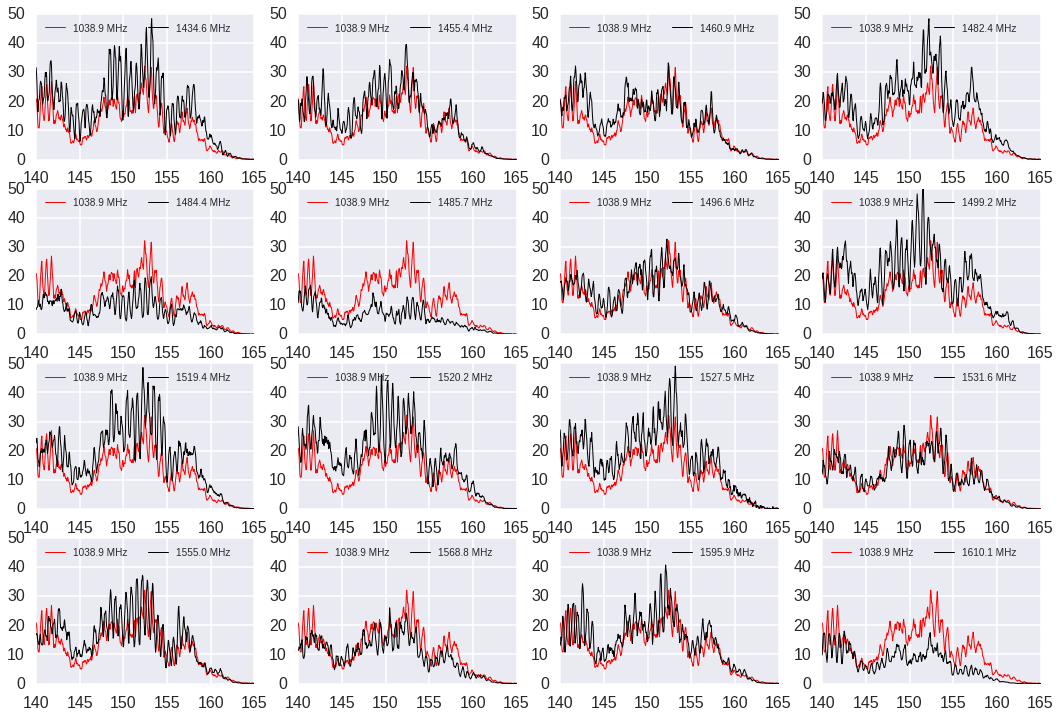

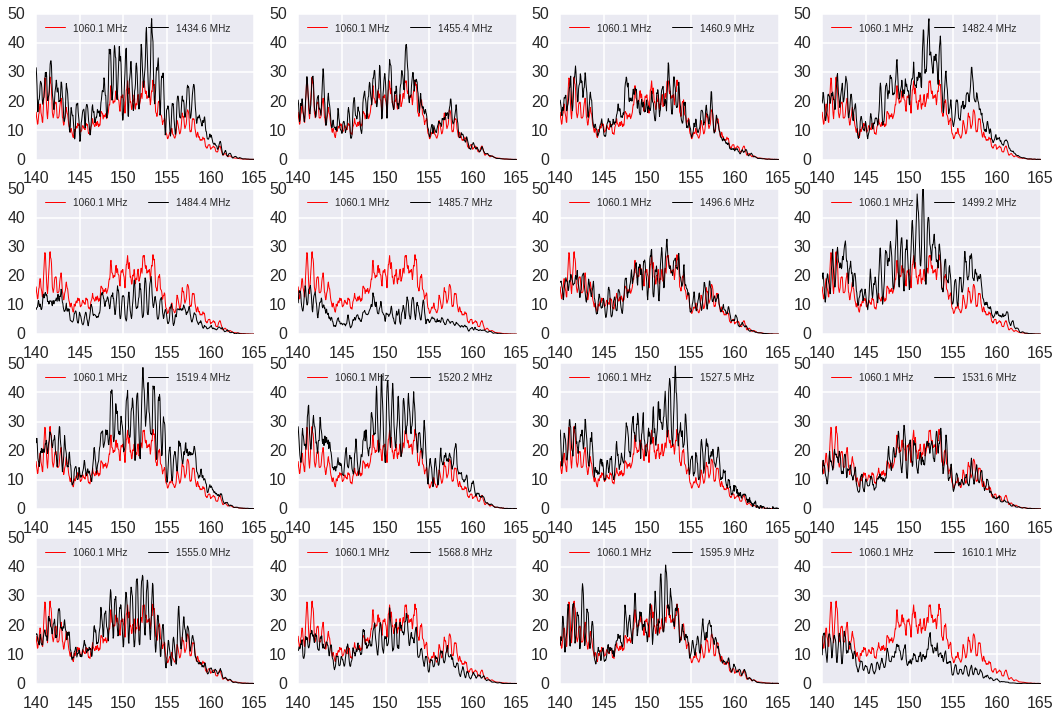

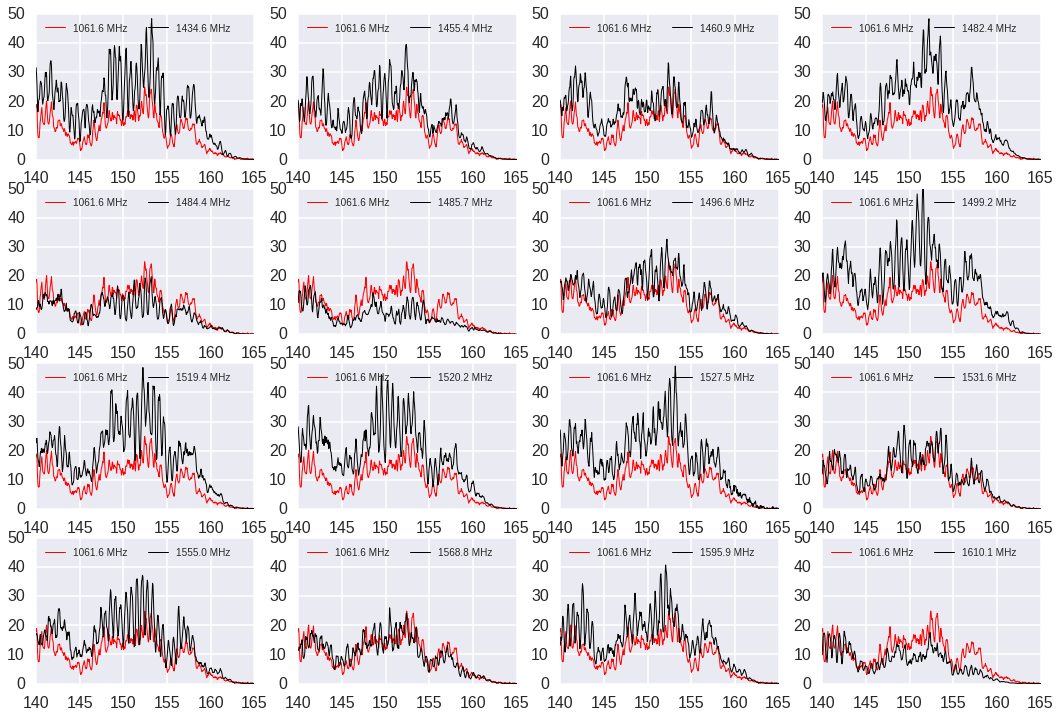

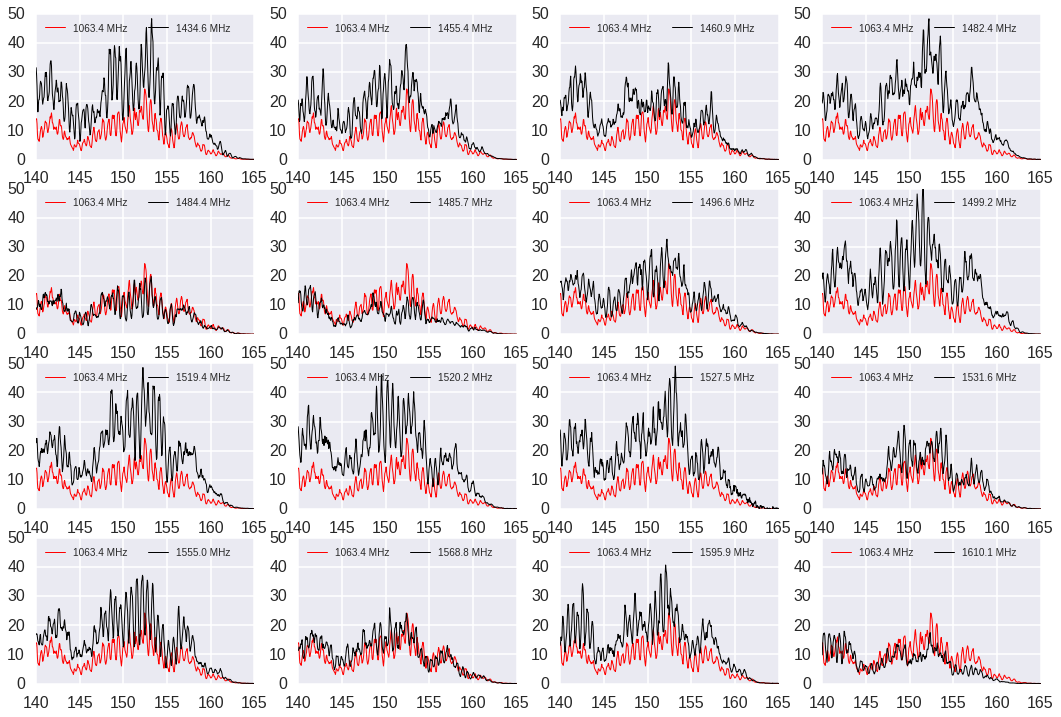

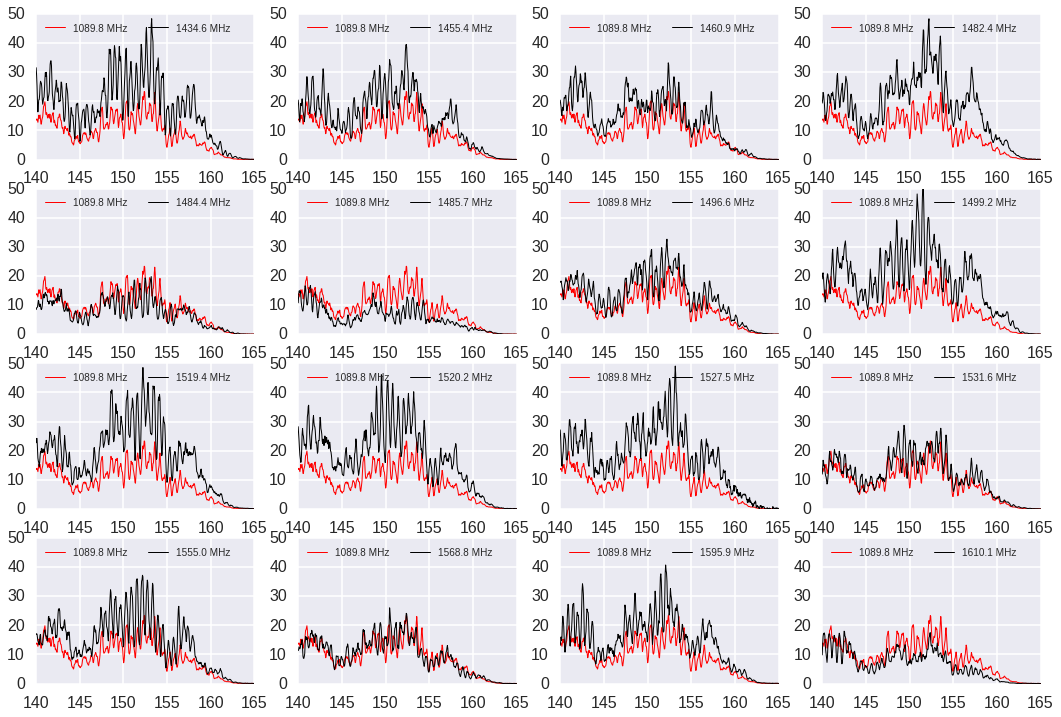

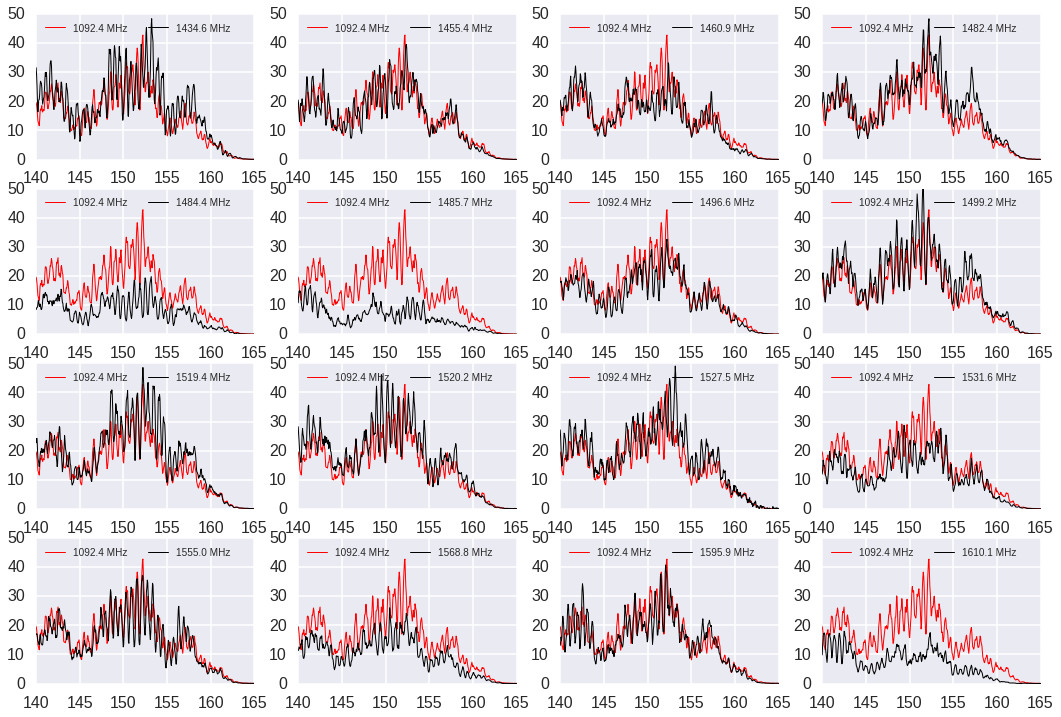

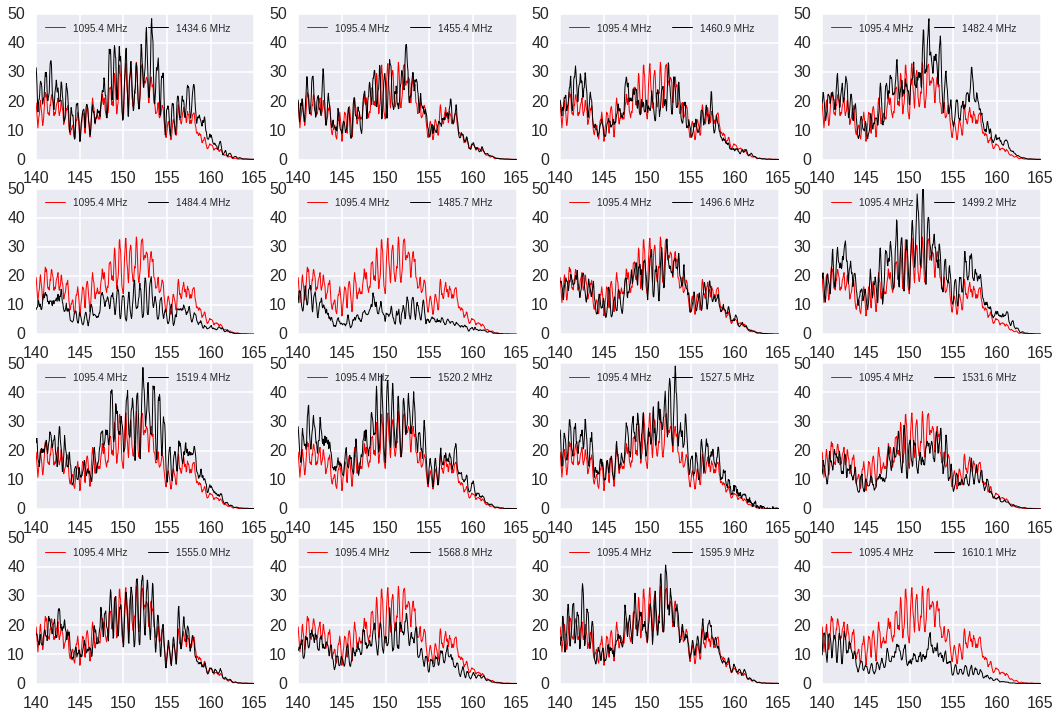

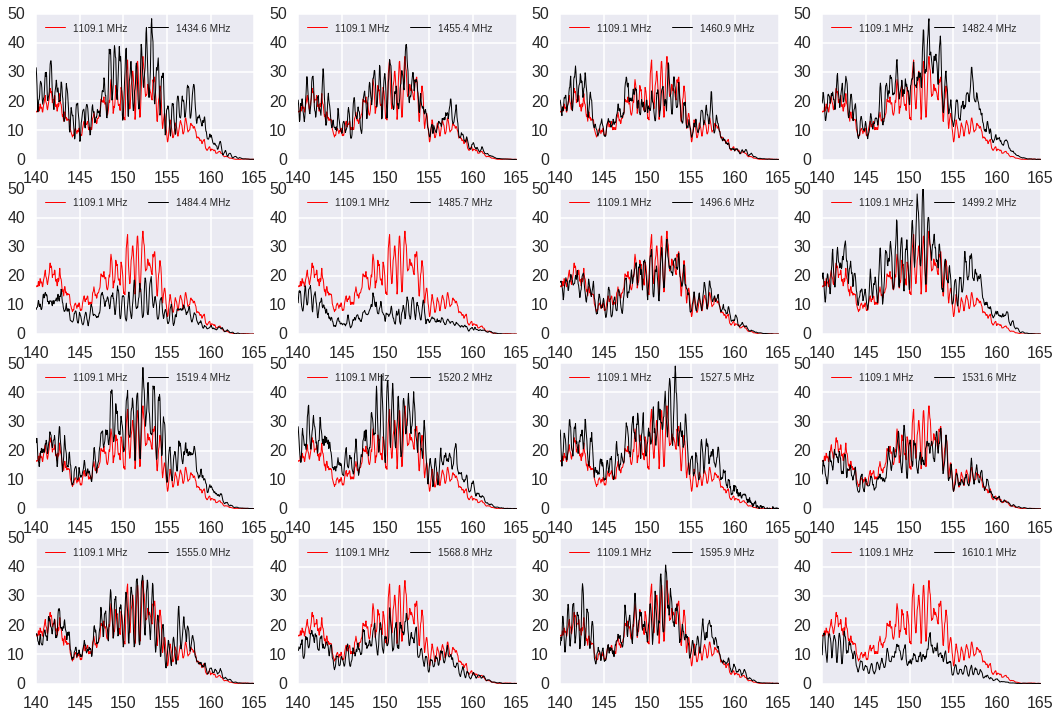

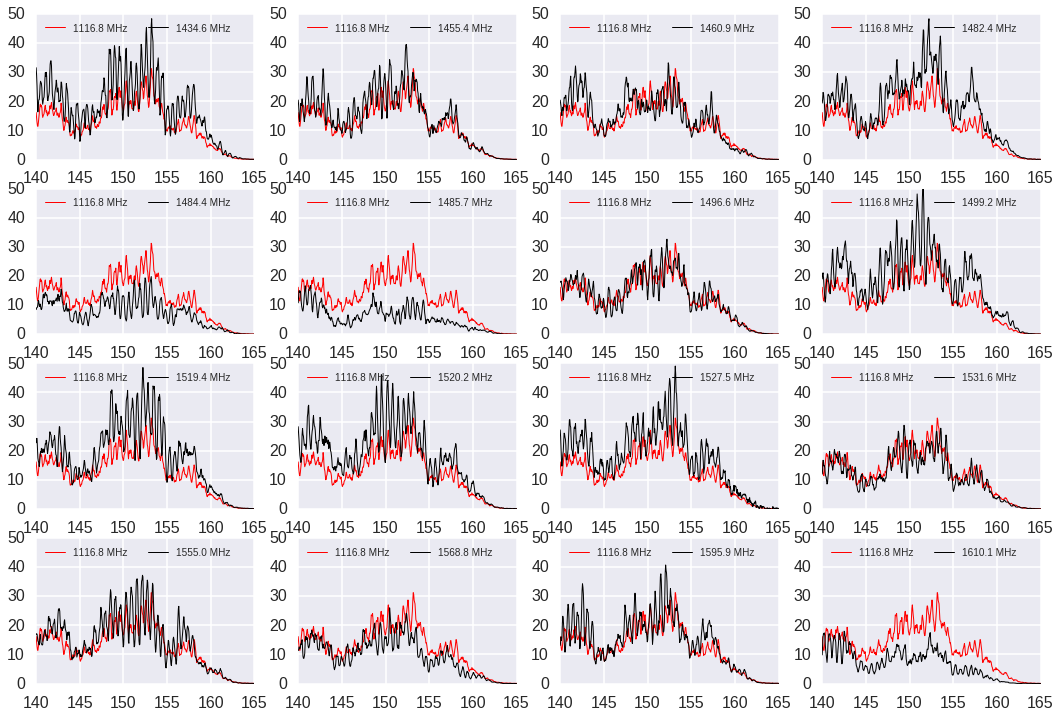

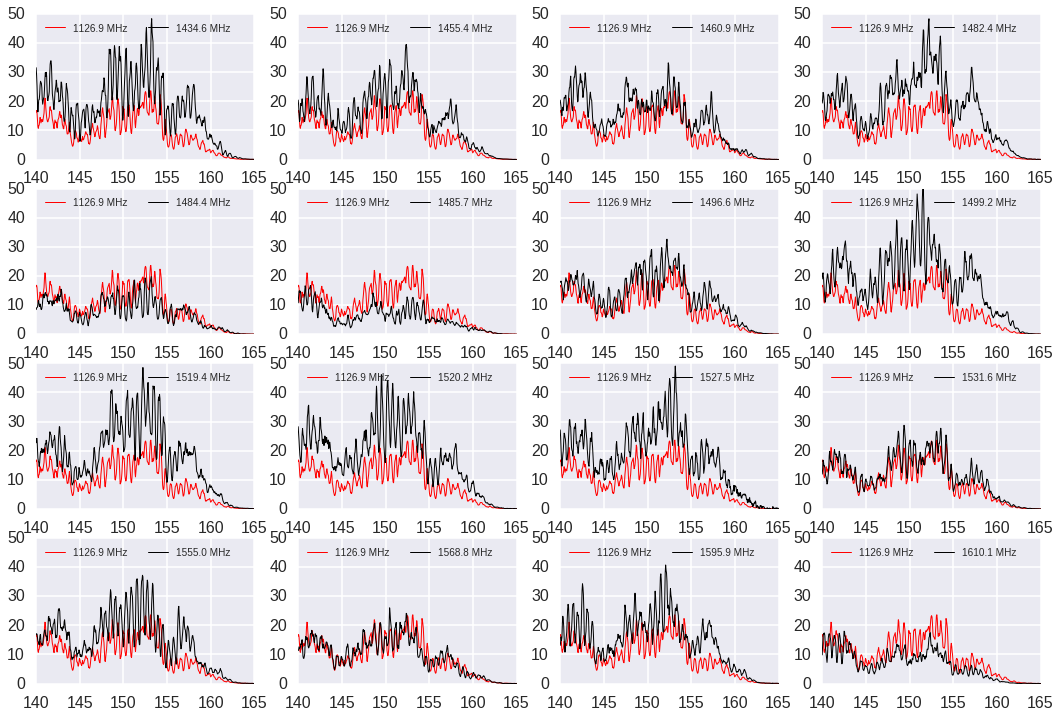

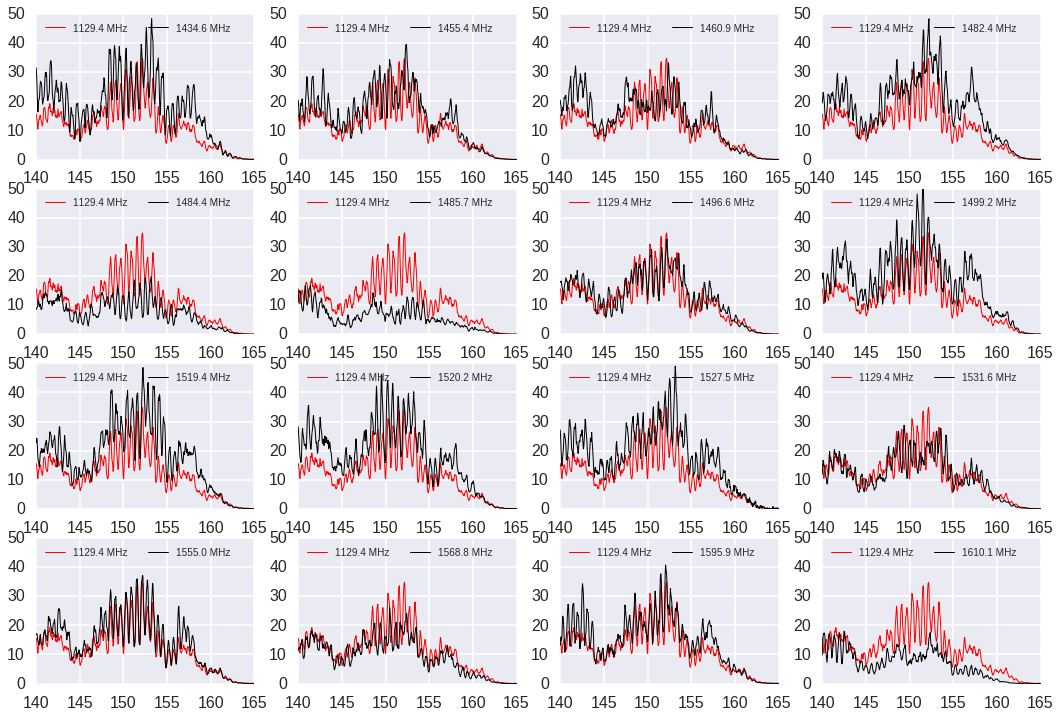

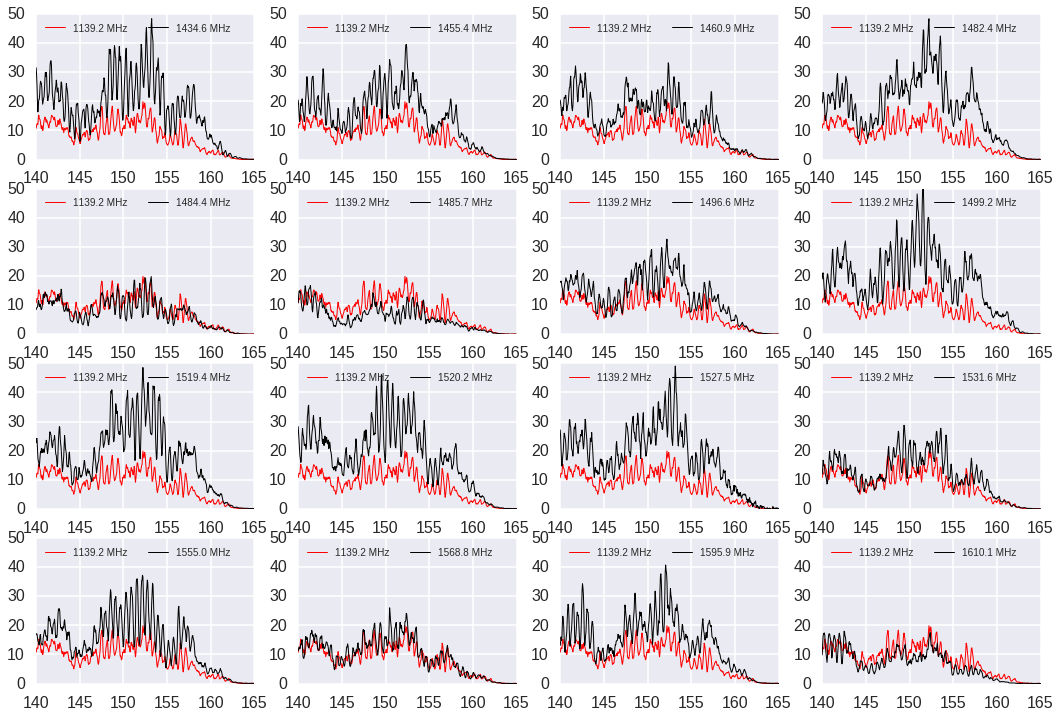

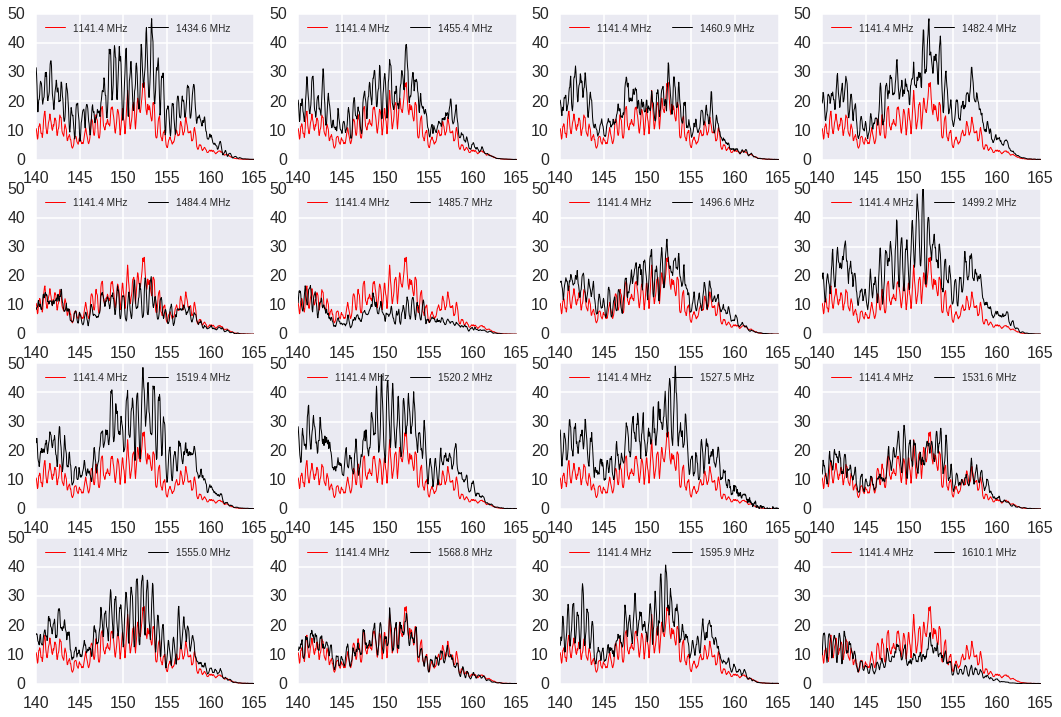

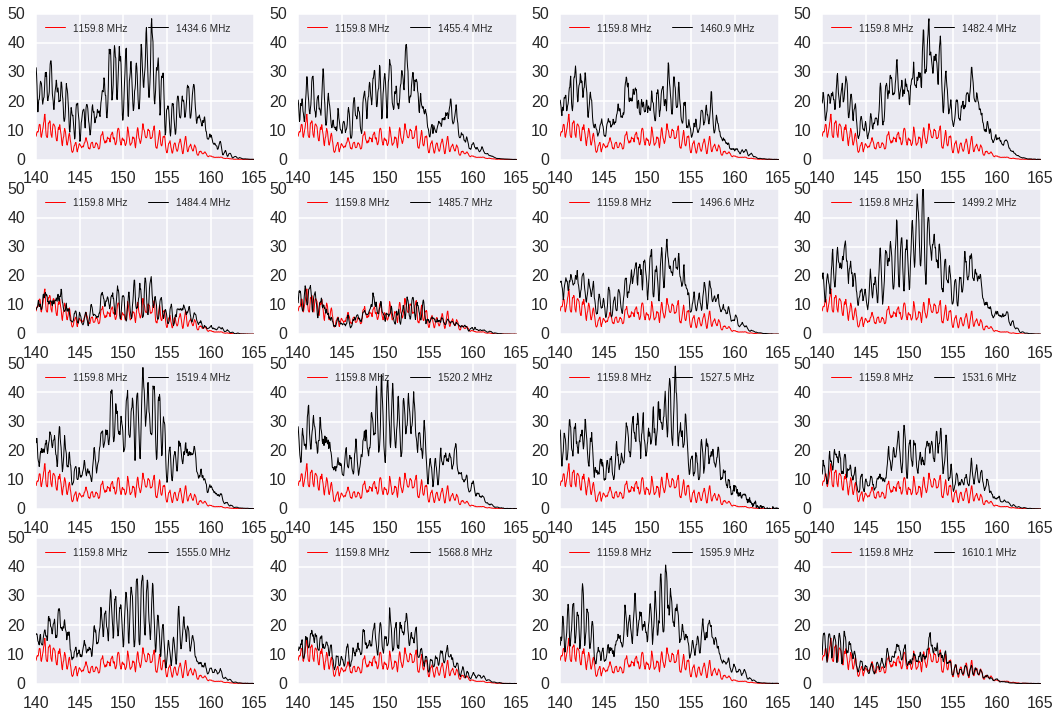

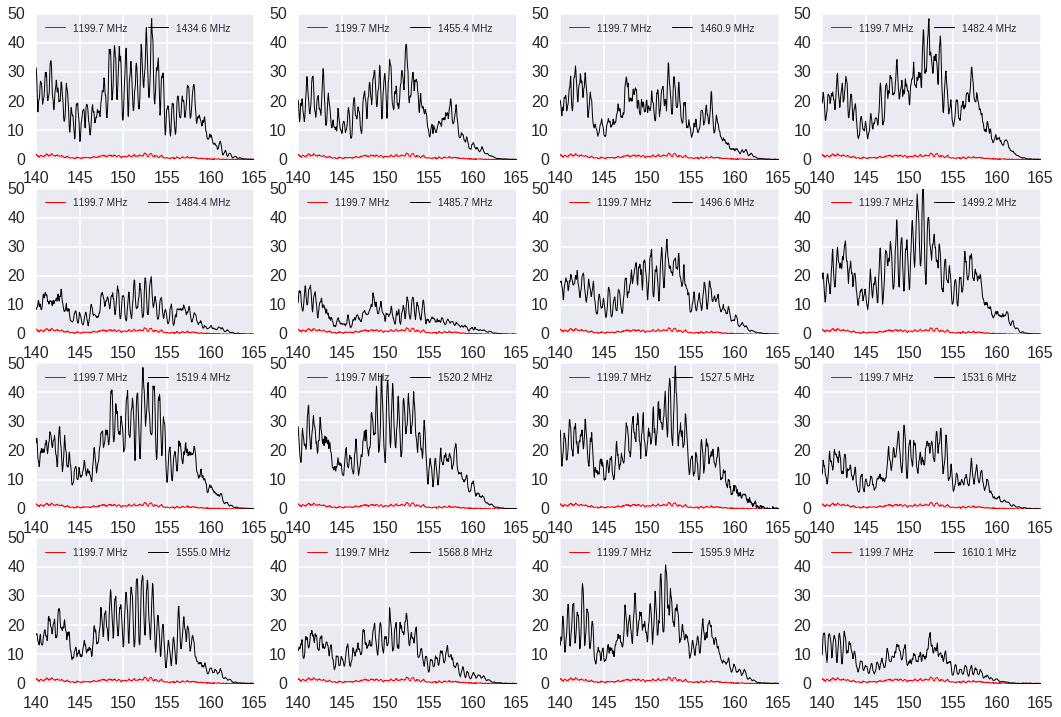

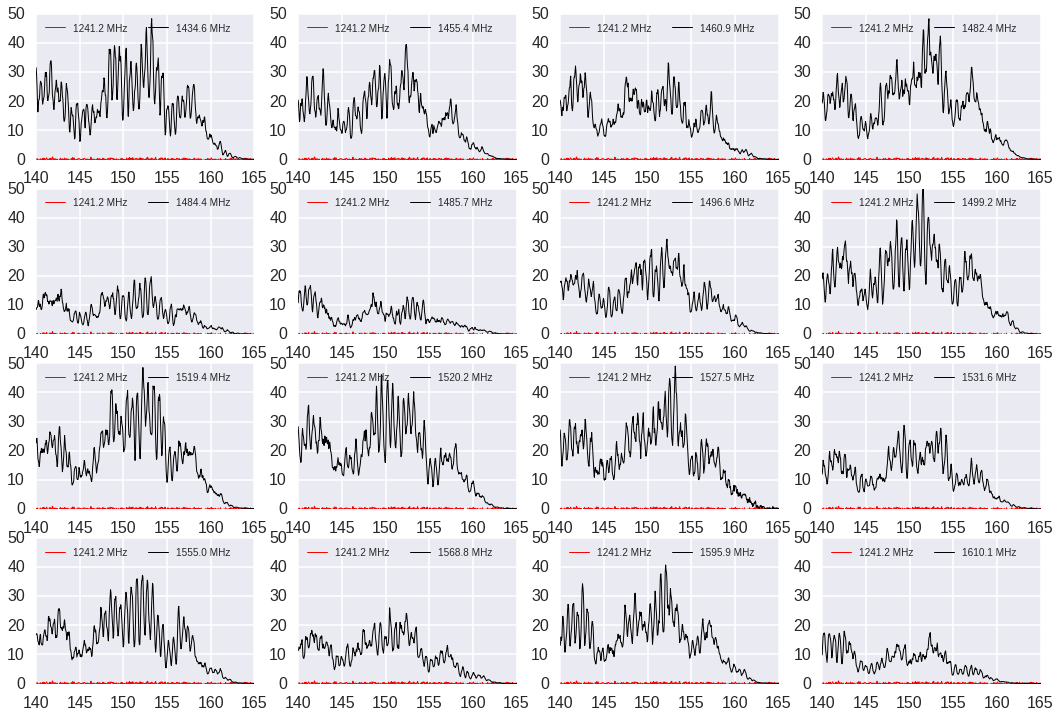

In [29]:
for m in range(16):
    fig,axs = subplots(4,4,figsize=(18,12))
    for k in range(16):
        ax =axs.flatten()[k]
        mmw = mmws[m]
        #ax.plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmws[k+16].mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
        ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
        ax.plot(mmw.mmw_freq/1e9,1e6*mmws[k+16].mmw_frac_response,'k',label = ("%.1f MHz" % mmws[k+16].resonator.f_0))
        #mmw = mmws[k+16]
        #ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
        ax.set_ylim(0,50)
        
        ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
    fig.savefig('/artemis/readout/plots/2016-03-03-mmw-sweep-compare/%d_%.1f_MHz.pdf' % (m,mmw.resonator.f_0),bbox_inches='tight')

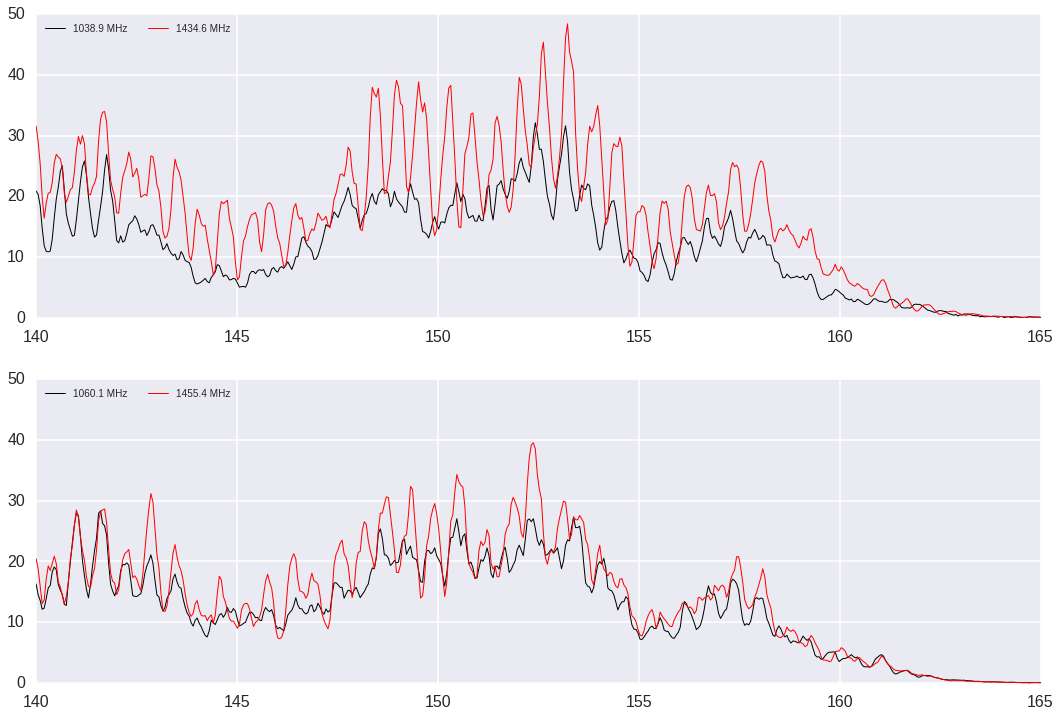

In [15]:
fig,axs = subplots(2,1,figsize=(18,12))
for k in range(2):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(-.1,50)
    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))

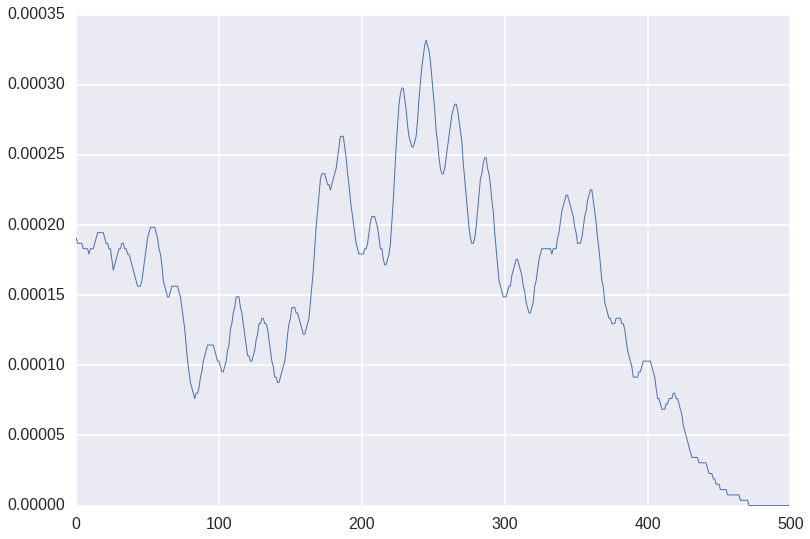

In [52]:
plot(mmw.zbd_voltage)

In [53]:
pd.DataFrame(dict(mmw_freq=mmw.mmw_freq, zbd_voltage=mmw.zbd_voltage)).to_csv('/artemis/readout/archive/2016-03-03-mmwave-zbd-voltage.csv')

(0, 50000.0)

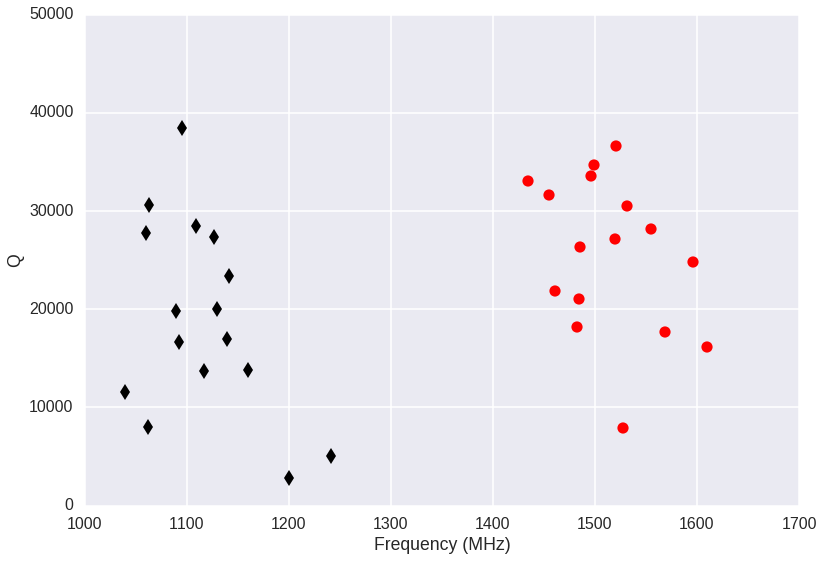

In [12]:
plot(f0s[:16],Qs[:16],'kd')
plot(f0s[16:],Qs[16:],'ro')
xlabel('Frequency (MHz)')
ylabel('Q')
ylim(0,50e3)
#plt.savefig(plot_dir + ('mmw-Q-vs-f0.png'),bbox_inches='tight')

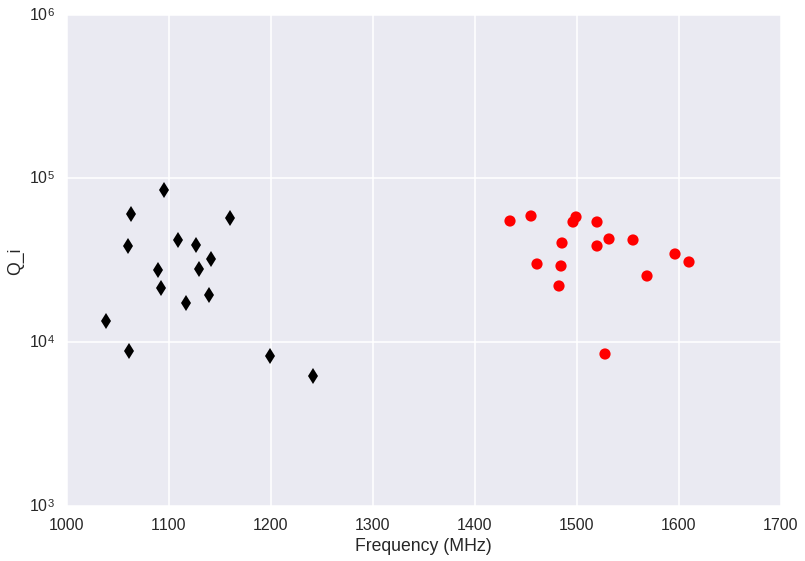

In [13]:
plot(f0s[:16],Qis[:16],'kd')
plot(f0s[16:],Qis[16:],'ro')
ylim(1000,1e6)
yscale('log')
xlabel('Frequency (MHz)')
ylabel('Q_i')
#plt.savefig(plot_dir + ('mmw-Qi-vs-f0.png'),bbox_inches='tight')

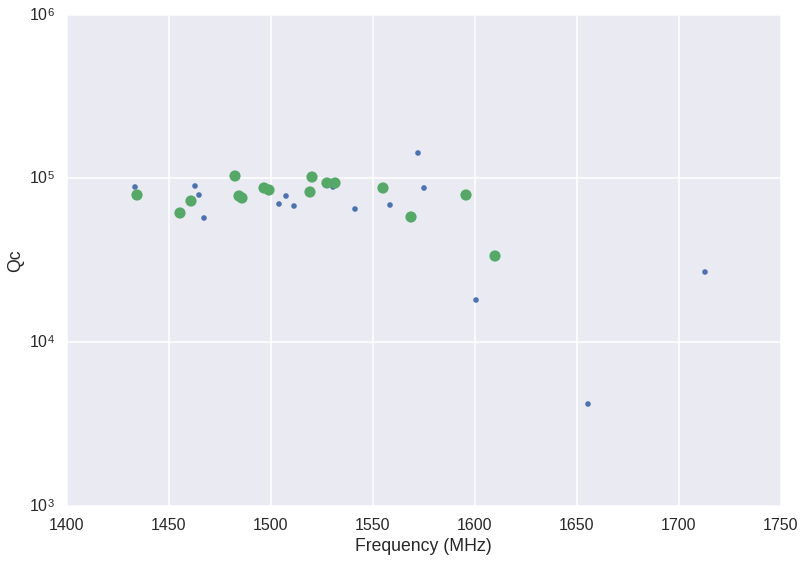

In [14]:
plot(f0s[:16]*1.38,Qers[:16],'.')
plot(f0s[16:],Qers[16:],'o')
ylim(1000,1e6)
yscale('log')
ylabel('Qc')
xlabel('Frequency (MHz)')
#plt.savefig(plot_dir + ('mmw-Qe-vs-f0.png'),bbox_inches='tight')